# 1. Loading the Required Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/a-large-scale-fish-dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00033.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00004.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00023.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00041.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00024.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00035.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00045.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00038.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00025.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/0000

# 2. Data Preprocessing

The code snippet traverses folders containing image files in '.png' format and collects the path and label of these files. It then places this information into a Pandas DataFrame.

In [2]:
label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset'
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':
            if dir_name.split()[-1]!='GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name, filename))
                
        
data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

# 3. Content of Dataset

In [3]:
data.head() 

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
1,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
2,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
3,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
4,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat


In [4]:
data.tail()

,path,label
9276,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9277,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9278,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9279,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9280,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


# 4. Converting Data to NumPy Array

In order to use image data in machine learning and deep learning projects, the data must be converted into a numpy array by applying the normalization process.

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(df, target_size=(28, 28)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['path'], target_size=target_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalizasyon
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)


In [6]:
X, y = load_images(data)

# 5. Splitting Data into Training and Test Sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7424, 28, 28, 3)
X_test shape: (1857, 28, 28, 3)
y_train shape: (7424,)
y_test shape: (1857,)


Visualization

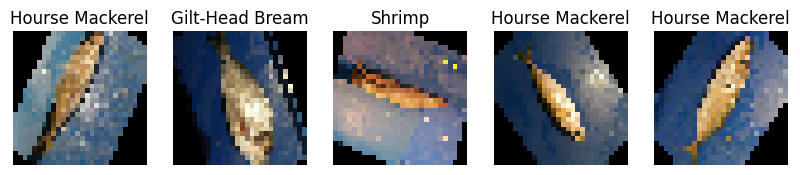

In [9]:
import matplotlib.pyplot as plt

def plot_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{labels[i]}')
        plt.axis('off')
    plt.show()
    
plot_images(X_train, y_train, num_images=5)    

# 6. Apply Flatten Operation

Flattening is the process of converting a multidimensional data structure into a one-dimensional array. This is usually done in deep learning models to prepare the data provided to the input layer.

In [10]:
# X_train dizisi (7424, 28, 28, 3) boyutunda
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 3)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 3)).astype('float32') / 255


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (7424, 2352)
X_test shape: (1857, 2352)


It divides the training data into two sets: train and validation.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
print('y_train shape:', y_train.shape)
print('y_train sample:', y_train[:5])

print('y_val shape:', y_train.shape)
print('y_val sample:', y_val[:5])

print('y_test shape:', y_train.shape)
print('y_test sample:', y_test[:5])

y_train shape: (5939,)
y_train sample: ['Red Sea Bream' 'Black Sea Sprat' 'Trout' 'Gilt-Head Bream' 'Sea Bass']
y_val shape: (5939,)
y_val sample: ['Gilt-Head Bream' 'Shrimp' 'Gilt-Head Bream' 'Shrimp' 'Red Mullet']
y_test shape: (5939,)
y_test sample: ['Black Sea Sprat' 'Trout' 'Red Mullet' 'Shrimp' 'Hourse Mackerel']


A correction due to a name error in the dataset

In [13]:
y_train = np.where(y_train == 'Gilt Head Bream', 'Gilt-Head Bream', y_train)
y_val = np.where(y_val == 'Gilt Head Bream', 'Gilt-Head Bream', y_val)
y_test = np.where(y_test == 'Gilt Head Bream', 'Gilt-Head Bream', y_test)


# 7. Label Encoding and One Hot Encoding Process

Label encoding is used to convert categorical labels into numerical values. One-hot encoding creates a vector for each label.

In [14]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Label encoding işlemi
label_encoder = LabelEncoder()

# Y_train, Y_val ve Y_test için label encoding uygulanması
y_train_encoded = label_encoder.fit_transform(y_train)  
y_val_encoded = label_encoder.transform(y_val)          
y_test_encoded = label_encoder.transform(y_test)        

# One-hot encoding işlemi
y_train = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_val = tf.keras.utils.to_categorical(y_val_encoded, num_classes=len(label_encoder.classes_))
y_test = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# Yeni boyutların kontrolü
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

# Örnekler
print('y_train sample:', y_train[:5])
print('y_val sample:', y_val[:5])
print('y_test sample:', y_test[:5])

print(type(y_train))
print(type(y_val))
print(type(y_test))


y_train shape: (5939, 10)
y_val shape: (1485, 10)
y_test shape: (1857, 10)
y_train sample: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
y_val sample: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
y_test sample: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 8. Creating a Model

In [15]:
model = tf.keras.models.Sequential()

Input layer formation

In [16]:
# Input nesnesi
model.add(tf.keras.layers.Input(shape=(28 * 28 * 3,)))

# Input katmanı
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

Creation of hidden layers. Dropout is a technique used to prevent overfitting.

In [17]:
#Hidden Layer 1
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.4))

#Hidden Layer 2
model.add(tf.keras.layers.Dense(256, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.4))

#Hidden Layer 3
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.4))

In [18]:
# Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
# Modelin derlenmesi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#9. Training the Model

To make the training process of the model more efficient, the early stopping technique is used. This technique monitors whether the validation loss of the model is stalling or getting worse during the training period. It helps to prevent over-learning.

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
results = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1729611661.674713      68 service.cc:145] XLA service 0x7998f400c330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729611661.674764      68 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


41/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1191 - loss: 2.2748

I0000 00:00:1729611667.439398      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.1193 - loss: 2.2717 - val_accuracy: 0.1946 - val_loss: 2.2150
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1467 - loss: 2.1899 - val_accuracy: 0.2397 - val_loss: 1.9628
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2092 - loss: 1.9856 - val_accuracy: 0.2552 - val_loss: 1.8672
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2639 - loss: 1.8459 - val_accuracy: 0.3212 - val_loss: 1.7409
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2925 - loss: 1.7767 - val_accuracy: 0.3744 - val_loss: 1.6279
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3512 - loss: 1.6549 - val_accuracy: 0.4229 - val_loss: 1.4847
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3927 - loss: 1.5485 - val_accuracy: 0.4465 - val_loss: 1.4251
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4238 - loss: 1.5098 - val_accuracy: 0.4471 - val_loss: 1.4309


# 10. Graphs of the Educational Process

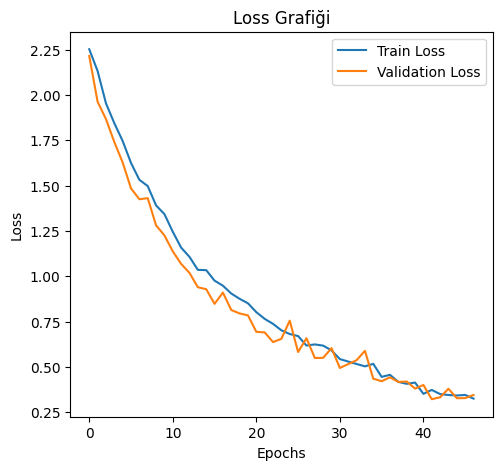

In [21]:
plt.figure(figsize=(12, 5))

# Loss grafiği
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

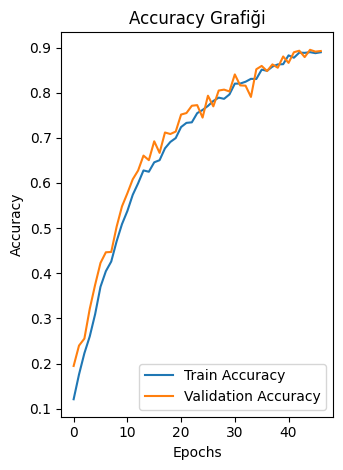

In [22]:
# Accuracy grafiği
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 11. Testing Phase

In [23]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [24]:
#Modelin değerlendirilmesi
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 0.41388678550720215
Test Accuracy: 0.8680667877197266
